<a href="https://colab.research.google.com/github/PatrikRadocaj/RUAP-Projekt/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Color Spaces and Histograms

**This command must be run before starting to do each lab.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab2 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 37 (delta 4), reused 13 (delta 2), pack-reused 14 (from 1)
Receiving objects: 100% (37/37), 6.06 MiB | 36.70 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Color Spaces

In this lab, you'll get familiar with image color spaces. On the web and in general usage, most images are encoded as **RGB**: **R**ed, **G**reen, and **B**lue. OpenCV generally uses **BGR**: Blue, Green, Red.

This is just one of the many ways we can represent an image. In an RGB image, we get a pixel by mixing the three colors. We can get the same pixel by using different numbers and formulae to combine them. For instance, the **CMYK** color space encodes each pixel in 4 primary colors: **C**yan, **M**agenta, **Y**ellow and **K**ey (Black). Since printers use these primary colors, CMYK is often used when preparing images for print.

Not all color spaces consist only of primary colors. For instance, **HSV** (**H**ue, **S**aturation, **V**alue) stores the color in Hue, the color's intensity in Saturation, and the general brightness of that pixel in Value. The Hue portion is a number in [0, 179] (in OpenCV, usually it's an arc around a circle, so [0, 360)) where 0 is red, and the hue slowly shifts to green and then blue as you get to higher numbers.

![](https://github.com/ferit-osirv/lab2/blob/main/hsv_1.png?raw=1)

You can think of the whole HSV color space as a cylinder. The height on the cylinder corresponds to how dark the pixel is, the distance from the center tells you how non-gray it is, and the angle tells you which color the pixel is.

![](https://github.com/ferit-osirv/lab2/blob/main/hsv_2.png?raw=1)

*(source: https://en.wikipedia.org/wiki/HSL_and_HSV#/media/File:HSV_color_solid_cylinder_saturation_gray.png)*

There are many color spaces each with its uses. One other color space we'll mention in **YCbCr**. Y is the **luma** component, similar to the Value in HSV. Cb is the **blue-difference chroma component**, i.e. how blue should this pixel be tinted. Similarly, Cr is the **red-difference chroma component**, which tells you how much should a pixel be tinted red. Even with a different type of representation, each YCbCr is capable of showing all RGB images.

![](https://github.com/ferit-osirv/lab2/blob/main/ycbcr.png?raw=1)

*(source: https://en.wikipedia.org/wiki/YCbCr#/media/File:CCD.png)*

The reason YCbCr is important is because of the human eye. Our eyes are much more sensitive to luminance than actual color differences. Therefore, when compressing images, it's better to compress the chroma components than luminance if you want the image to look the same to a human observer.  This is called **chroma subsampling** and is used heavily in image and video compression, including MPEG, JPEG, DVD and Blu-Rays, and many others.

**In OpenCV**

OpenCV supports a plethora of color spaces for images. The main function to convert color spaces is: [img = cv.cvtColor(img, code)](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). The `code` tells OpenCV **from** which format to convert the image, as well as **to** which format. You can see all the color conversion codes [here](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0). For example:

- cv.COLOR_BGR2YCrCb (BGR to YCbCr)
- cv.COLOR_YCrCb2BGR (back to BGR as the name suggests)
- cv.COLOR_RGB2HSV
- etc.

Note: You'll have to convert the image back to RGB if you want to use matplotlib to display it in its original form.

Not all color spaces always go from 0 to 255. For instance, in the HSV colorspace, **the values for the Hue channel can only be in the range [0, 180]**. Take a look at the following code block:


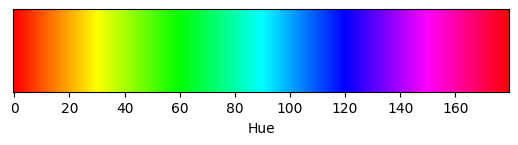

In [3]:
hsv_range_img = np.zeros((30, 180, 3), dtype=np.uint8)
for i in range(180):
    hsv_range_img[:, i, :] = [i, 255, 255]

hsv_range_img = cv.cvtColor(hsv_range_img, cv.COLOR_HSV2RGB)
plt.imshow(hsv_range_img)
plt.xlabel('Hue')
plt.yticks([]);

Here, we have created an image containing each possible hue value from left to right by setting the Hue channel of the image to the x-axis value. You can use this as a guide for solving the assignments.

> ### Assignment 1: Modifying the Hue of an Image
>
> #### Overview
>
> Modifying the hue channel proves particularly valuable in scenarios requiring precise color adjustments or transformations. In the realm of digital media and photography, artists and photographers often leverage hue adjustments to create specific artistic effects or correct color casts. This includes transforming the overall color theme of an image, such as changing green foliage to autumnal hues, or neutralizing unwanted color tints caused by lighting conditions to ensure the natural colors of the subjects are accurately represented.
>
> #### Tasks
>
> 1. Load the image `peppers.png` from the `images` directory using OpenCV.
> 2. Convert the image to HSV.
> 3. Using addition or subtraction, modify the hue channel such that the red peppers become yellow. (Hint: You can use the HSV range image above.)
> 4. Display the resulting image as a regular RGB image.

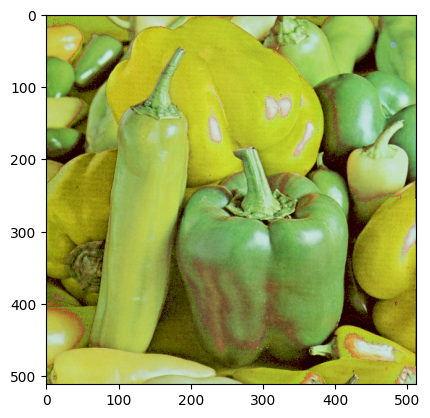

In [12]:
from cv2.gapi import mask
img = cv.imread('images/peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
low_red1 = np.array([0,70,50])
high_red1 = np.array([10,255,255])
low_red2 = np.array([170,70,50])
high_red2 = np.array([180,255,255])
mask = cv.inRange(img, low_red1, high_red1) + cv.inRange(img, low_red2, high_red2)

h=img[:,:,0]
h[mask>0] = (h[mask > 0]+30)%180
img[:,:,0]= h.astype(np.uint8)
img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
plt.imshow(img)


> ### Assignment 2: HSV Thresholding
>
> #### Overview
>
> The HSV color space simplifies object detection by allowing for hue thresholding, which isolates objects based on their color, unaffected by lighting variations. This method is effective when the object's color stands out from its background, enabling straightforward and accurate identification.
>
> #### Tasks
>
> 1. Load the image `peppers.png` from the `images` directory using OpenCV.
> 2. Convert the image to HSV.
> 3. Using simple numpy thresholding, find a region of the image which contains the duck. Show the result
> 4. Apply `utils.remove_noise(img)` to remove the small extra regions captured by the thresholding. Show the result.
> 5. Apple `utils.bounding_rect(img)` to find a rectange which contains the highlighted region of the image.
> 6. Show the original image with a drawn rectangle corresponding to the bounding box.
>
> #### Tips
>
> The documentation for the two utility functions:
>
> `remove_noise(img)`
>
> Removes noise from an image using morphological opening.
>
> - **Parameters:**
>   - `img`: Input image in BGR/RGB color space.
> - **Returns:**
>   - The output is a grayscale image with reduced noise.
> - **Description:**
>   - This function first converts the input image from BGR to grayscale. It then applies a morphological opening operation, which is an erosion followed by a dilation using a 5x5 kernel. This process helps in removing small noise points and smoothens the image.
>
> `bounding_rect(img)`
>
> Finds the bounding rectangle of the largest contour in an image.
>
> - **Parameters:**
>   - `img`: Input grayscale image. It's expected that the image preprocessing steps have already been applied to highlight the contours.
> - **Returns:**
>   - A tuple `(x, y, w, h)` representing the top-left corner coordinates `(x, y)`, and the width `w` and height `h` of the rectangle.
> - **Description:**
>   - The function converts the input image to grayscale and then finds contours using the external retrieval mode and simple chain approximation. It calculates the bounding rectangle for the first (largest) contour. This function is useful for object detection and localization within an image.

In [24]:
import utils
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

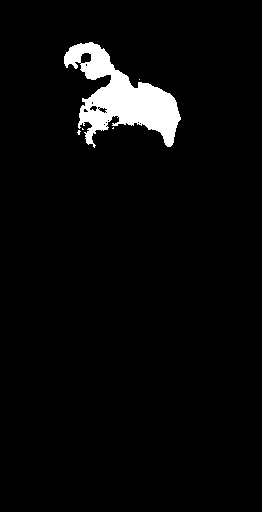

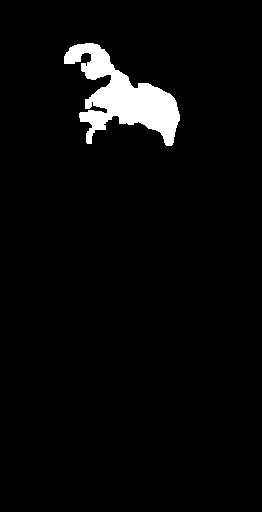

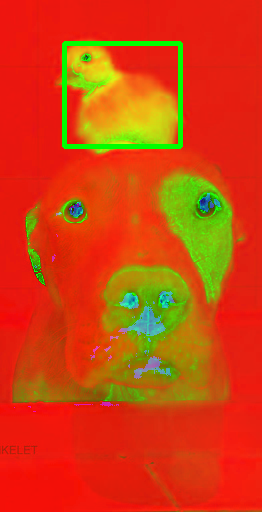

In [28]:
from google.colab.patches import cv2_imshow
import utils
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/ducks.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40,255,255])
mask = cv.inRange(img, lower_yellow, upper_yellow)

cv2_imshow(mask)

clean_mask = utils.remove_noise(mask)
cv2_imshow(clean_mask)

x, y, w, h = utils.bounding_rect(clean_mask)

result =img.copy()
cv.rectangle(result, (x, y), (x+w, y+h), (0,255,0),3)

cv2_imshow(result)

In [25]:
# Redefine utils.remove_noise to handle grayscale inputs correctly
# This function replaces the original `remove_noise` from utils.py in the current session.
def remove_noise_fixed(img):
    """
    Removes noise from an image using morphological opening.
    Handles both 3-channel (BGR/RGB) and 1-channel (grayscale) images.
    """
    # Check if the image is already grayscale (2 dimensions or 3 dimensions with 1 channel)
    if len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 1):
        img_gray = img
    else:
        # Assume it's a 3-channel image and convert to grayscale
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    kernel = np.ones((5, 5), np.uint8)
    return cv.morphologyEx(img_gray, cv.MORPH_OPEN, kernel)

# Overwrite the original function in the utils module with the fixed version
utils.remove_noise = remove_noise_fixed

print("utils.remove_noise has been updated to handle grayscale inputs.")

utils.remove_noise has been updated to handle grayscale inputs.


## Thresholding and Image Histograms

Thresholding is a simple, yet powerful, technique used to separate objects from the background in grayscale images. It involves selecting a threshold value, and then converting all pixels above this value to one intensity (often white or the maximum value) and all pixels below it to another (often black or zero). This creates a binary image, making it easier to identify and isolate objects of interest. Thresholding is particularly effective when there's a clear distinction in intensity between the objects and the background.

There are several types of thresholding:
- **Global Thresholding:** Applies a single threshold value to the entire image. This method is straightforward but works best when the image has high contrast and uniform lighting.
- **Adaptive Thresholding:** Calculates different thresholds for different regions of the image, which is useful for images with varying lighting conditions.
- **Otsu’s Thresholding:** An advanced method that automatically determines the optimal threshold value by maximizing the between-class variance, which is discussed in more detail below.

### Image Histograms
An image histogram is a graphical representation of the distribution of pixel intensities in an image. For grayscale images, the x-axis represents the possible intensity values (typically 0 to 255 for 8-bit images), and the y-axis represents the number of pixels at each intensity. Histograms provide insight into the contrast, brightness, and intensity distribution of an image, which are crucial for tasks like thresholding.

In the context of thresholding, analyzing the histogram can help in selecting an appropriate threshold value. For example, in a bimodal histogram (one that has two distinct peaks), the ideal threshold would likely be somewhere between the two peaks, separating the two dominant groups of pixel intensities.

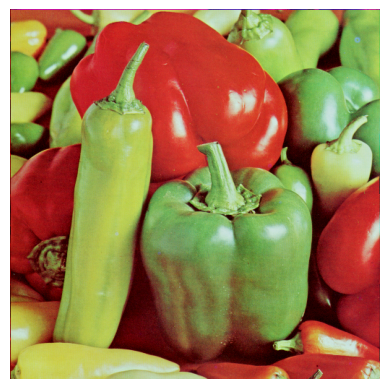

/tmp/ipython-input-2823577478.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 180, [0, 180])


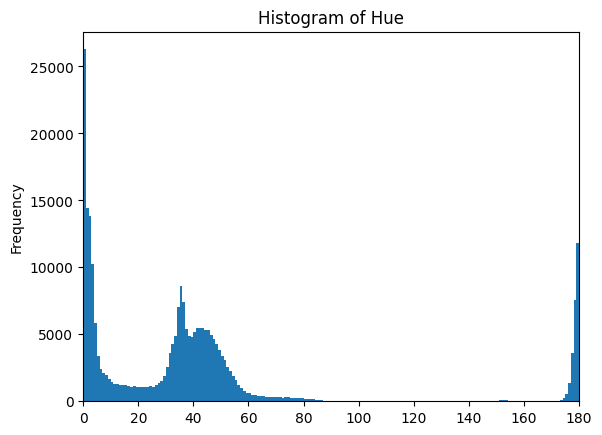

In [29]:
img_orig = cv.imread('images/peppers.png')
img = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img = img[:, :, 0]

# Show the image

plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Show the image's hue

plt.hist(img.ravel(), 180, [0, 180])
plt.xlim([0, 180])

plt.title('Histogram of Hue')
plt.ylabel('Frequency')
plt.show()

> ### Assignment 3: Thresholding Based on Histograms
>
> #### Introduction: Question
>
> Using your own language, interpret the following regions of the histogram and write down which parts of the image they belong to:
>
> 1) 160-20
> 2) 20-40
> 2) 40-100
>
> (Remember the hue range image from above.)

In [ ]:
# Write your answer here

1. is the red peppers
2. is the lighter green and yellow peppers
3. is the green peepers and everithing else

> #### Tasks
>
> 1. Using the histogram above, try to estimate a good threshold to separate the green peppers from the red peppers.
> 2. Threshold the image using the estimated threshold.

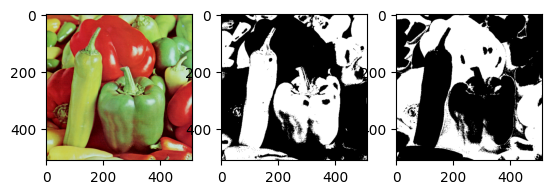

In [31]:
img_orig = cv.imread('images/peppers.png')
img = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)

lower_green = np.array([30, 50, 50])
upper_green = np.array([100, 255, 255])
mask_green = cv.inRange(img, lower_green, upper_green)

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([20, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])
mask_red = cv.inRange(img, lower_red1, upper_red1) + cv.inRange(img, lower_red2, upper_red2)

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.imshow(mask_green, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(mask_red, cmap='gray')

plt.show()


### Otsu's Thresholding

Otsu's method is an automatic thresholding technique that selects the threshold to minimize the intra-class variance or, equivalently, to maximize the inter-class variance. It's particularly useful when the histogram of the image has a bimodal distribution, as it effectively finds a threshold that separates the two classes (foreground and background) most distinctly. Implementing Otsu’s algorithm involves iterating through all possible threshold values and calculating the variance for each, then selecting the threshold that yields the highest between-class variance.

You can see this visually here:

![](https://upload.wikimedia.org/wikipedia/commons/3/34/Otsu%27s_Method_Visualization.gif)

This visualisation show's a histogram of some image. Notice that the histogram's distribution is bimodal, i.e. it is a sum of two normal distributions, with two peaks around x=10 and x=160.

The optimal threshold lies in between the two peaks. Otsu's method is a numerical way to calculate this threshold.

Otsu's method calculates the intra-class variance for each possible threshold value. Here, the classes are defined as pixels below the threshold (class 0) and pixels above the threshold (class 1). The intra-class variance $\sigma _{w}^{2}(t)$ for a threshold $t$ can be calculated as:

$$\sigma _{w}^{2}(t)=\omega _{0}(t)\sigma _{0}^{2}(t)+\omega _{1}(t)\sigma _{1}^{2}(t),$$

where $\omega _{0}$ $\omega _{1}$ are the probabilities of the two classes separated by a threshold $t$, and $\sigma _{0}^{2}$, $\sigma _{1}^{2}$ are variances of these two classes.

Here is how you can calculate each term:

- $\omega _{1}(t)$ is the probability that a pixel in the image falls in class 1. Therefore, you can calculate is as number of pixels in class 1 divided by total number of pixels.
- $\sigma _{1}^{2}(t)$ is the variance of all pixels in class 1. You can use `np.var(pixels)` to calculate the variance.

The Otsu method works by going through each possible threshold value and calculating the intra-class variance for the threshold. In the end, the threshold for the minimum intra-class variance is chosen.

<br />

> ### Assignment 4: Implement Otsu Thresholding
>
> 1. Using the description above and only numpy functions, implement a function which will return the Otsu threshold given some grayscale image.
> 2. Test the function on the image `images/sudoku_1.jpg`.
> 3. Use [OpenCV's built-in Otsu thresholding function](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) to do the same. Compare the two > threshold values.
>
> Note: On the internet you will find different ways of implementing the function, using histograms and/or int**er**-class variance. The one mentioned > > above (using two classes and calculating the variance with numpy) is the easiest to implement with numpy.

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold(gray):
    # Flatten and build histogram
    pixel_counts, bins = np.histogram(gray.ravel(), bins=256, range=(0, 256))
    total = gray.size
    sum_total = np.dot(np.arange(256), pixel_counts)

    sumB, wB, max_var, threshold = 0, 0, 0, 0

    for t in range(256):
        wB += pixel_counts[t]
        if wB == 0:
            continue
        wF = total - wB
        if wF == 0:
            break
        sumB += t * pixel_counts[t]
        mB = sumB / wB
        mF = (sum_total - sumB) / wF
        var_between = wB * wF * (mB - mF) ** 2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold




Manual Otsu threshold: 145
OpenCV Otsu threshold: 145.0


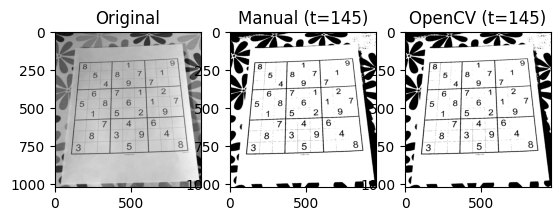

In [34]:
img = cv.imread('images/sudoku_1.jpg', cv.IMREAD_GRAYSCALE)
t_manual = otsu_threshold(img)
print("Manual Otsu threshold:", t_manual)

_, result_manual = cv.threshold(img, t_manual, 255, cv.THRESH_BINARY)

t_cv, result_cv = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print("OpenCV Otsu threshold:", t_cv)

plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(1,3,2); plt.imshow(result_manual, cmap='gray'); plt.title(f'Manual (t={t_manual})')
plt.subplot(1,3,3); plt.imshow(result_cv, cmap='gray'); plt.title(f'OpenCV (t={int(t_cv)})')
plt.show()

## Histogram Equalization

Take a look at the following image and its histogram:

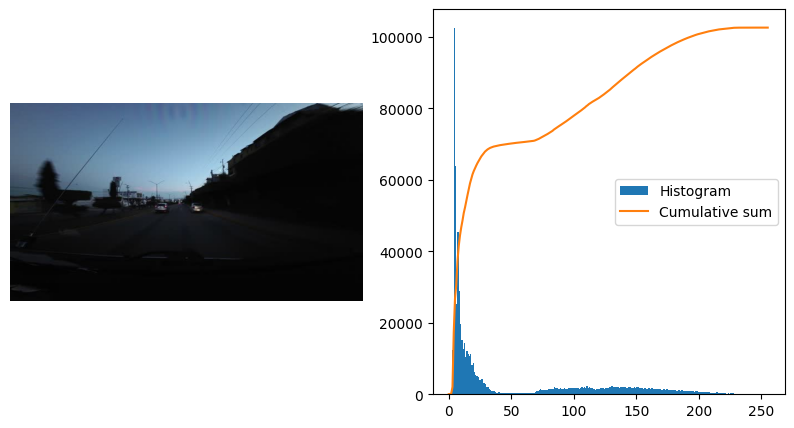

In [ ]:
img = cv.imread('images/driving.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].axis('off')

axs[1].hist(img.ravel(), 256, [0, 256], label='Histogram')
# show cumulative sum of the histogram
cumsum = np.cumsum(np.histogram(img, 256, [0, 256])[0])
cumsum = cumsum / cumsum[-1]
cumsum *= max(np.histogram(img, 256, [0, 256])[0])
axs[1].plot(cumsum, label='Cumulative sum')
axs[1].legend()

The image is very dark. Therefore, almost all pixels are in the [0, 50] range, and the rest of the histogram is almost completely empty. What if we could increase the contrast by "stretching" the [0, 50] range of the histogram?

**Histogram equalization** is a fundamental image processing technique used to improve the contrast in images. It works by effectively spreading out the most frequent intensity values of an image, making details in both the bright and dark regions more visible. This method is particularly useful in images with backgrounds and foregrounds that are both bright or both dark.

How Histogram Equalization Works:

1. **Compute the Histogram**: Calculate the histogram of the image, which is a graphical representation of the distribution of pixel intensities. For grayscale images, this involves counting the occurrences of each intensity value.

2. **Calculate the Cumulative Distribution Function (CDF)**: The CDF is calculated from the histogram, which represents the cumulative sum of the pixel intensity occurrences up to a certain value. This step effectively maps the old pixel values to new ones based on the cumulative distribution, ensuring a more uniform spread of intensities.

3. **Normalize the CDF**: To ensure the CDF covers the full intensity range of the output image (e.g., 0 to 255 for an 8-bit image), the CDF is normalized by subtracting the minimum CDF value and scaling according to the intensity range.

4. **Map the Pixel Values**: Use the normalized CDF to map the original pixel values of the image to new values, resulting in an image with enhanced contrast.

<br /><br />

> ### Assignment 5: Histogram Equalization
>
> Implement histogram equalization using the steps described above.
>
> The process of histogram equalization involves several key steps that can be implemented in Python. Here’s a detailed explanation of each step with instructions suitable for implementation:
>
> 1. Compute the Histogram
>   - Use `numpy.histogram()` function to compute the histogram. The function takes the flattened image array (`image.flatten()`) and the number of bins as arguments. Set the range to cover all possible pixel intensities.
> 2. Calculate the Cumulative Distribution Function (CDF)
> - Use `numpy.cumsum()` function, which returns the cumulative sum of the histogram.
> 3. Normalize the CDF
> - Here is the formula to normalize a function to a range of $[0, 255]$: $y = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} \times 255$
> 4. Map the Pixel Values
> - Use the supplied function.
>
> **Tasks:**
>
> 1. Implement histogram equalization.
> 2. Test it on the image `images/driving.jpg`.
> 3. Show the resulting image, histogram and cumulative sum as it is shown above.

In [36]:
def map(img, cumsum):
  '''
  img: input image (grayscale)
  cumsum: cumulative sum of the histogram
  return: remapped image
  '''
  img_ = img.copy()
  img_ = cumsum[img_.flatten()]
  img_ = np.reshape(img_, img.shape)
  img_ = (img_ * 255).astype(np.uint8)
  return img_

def hist_eq(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256])

    cdf = hist.cumsum()

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    equalized = cdf_normalized[img]

    return equalized



/tmp/ipython-input-243214715.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,3,2); plt.hist(img.flatten(), 256, [0,256], color='gray'); plt.title("Original Histogram")
/tmp/ipython-input-243214715.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,3,5); plt.hist(eq_img.flatten(), 256, [0,256], color='gray'); plt.title("Equalized Histogram")


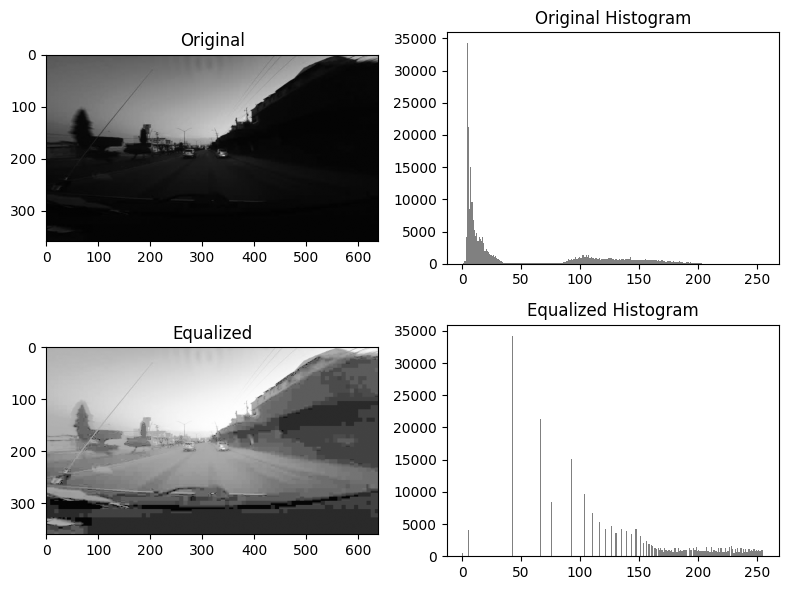

In [37]:
img = cv.imread('images/driving.jpg', cv.IMREAD_GRAYSCALE)
eq_img = hist_eq(img)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(2,3,2); plt.hist(img.flatten(), 256, [0,256], color='gray'); plt.title("Original Histogram")

plt.subplot(2,3,4); plt.imshow(eq_img, cmap='gray'); plt.title("Equalized")
plt.subplot(2,3,5); plt.hist(eq_img.flatten(), 256, [0,256], color='gray'); plt.title("Equalized Histogram")

plt.tight_layout()
plt.show()


### Adaptive Histogram Equalization

You might have noticed that the histogram-equalized image contains many artefacts. This is because we are blindly stretching the contrast in every region of the image.

To overcome the drawbacks of simple histogram equalization, **Contrast Limited Adaptive Histogram Equalization (CLAHE)** was developed as an enhancement that applies histogram equalization locally to different parts of an image, thus providing more nuanced control over contrast adjustment. CLAHE divides the image into small blocks or tiles, performs histogram equalization on each block independently, and limits the contrast enhancement to prevent noise amplification. By doing so, CLAHE maintains local contrast without significantly affecting the overall global contrast, preserving details across the image.

> ### Assignment 6: CLAHE
>
> 1. Use [OpenCV's CLAHE implementation](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html) to enhance the contrast of the image `images/driving.jpg`.
> 2. Show the resulting image for various tile grid sizes and clip limits, try out very small and very large values.
> 3. In your own words, explain what clip limit and tile grid size is and how it affects the result.

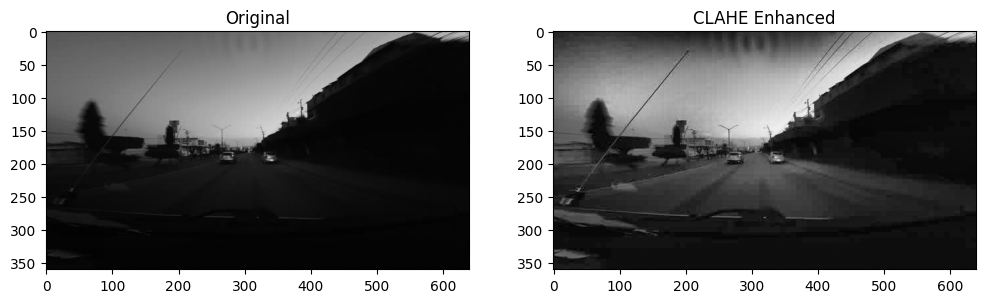

In [44]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/driving.jpg', cv.IMREAD_GRAYSCALE)


clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))


clahe_img = clahe.apply(img)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(clahe_img, cmap='gray'); plt.title('CLAHE Enhanced')
plt.show()


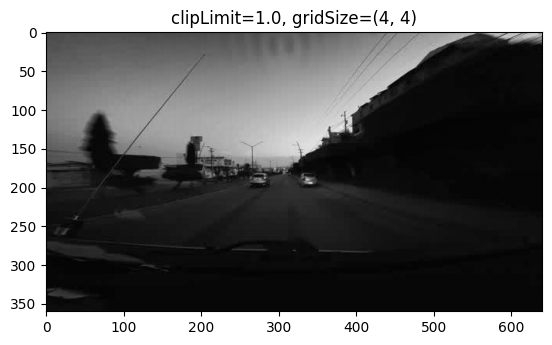

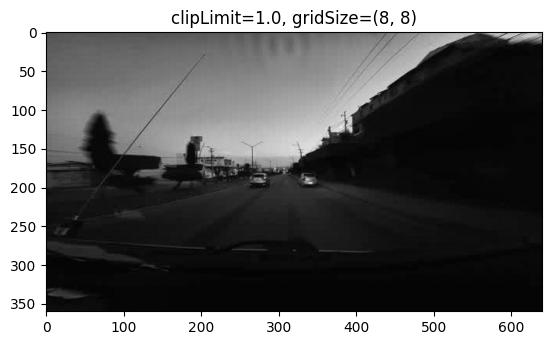

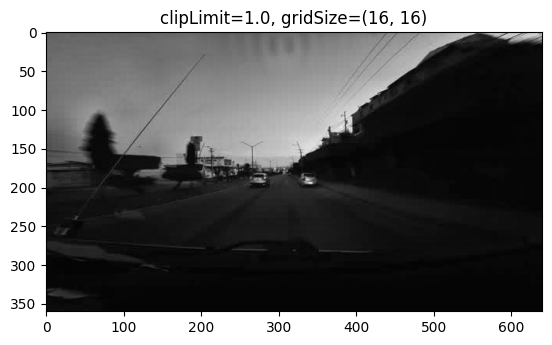

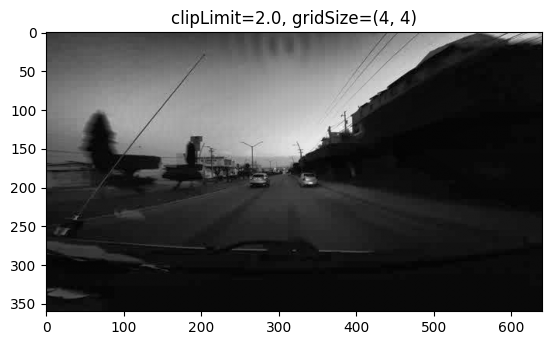

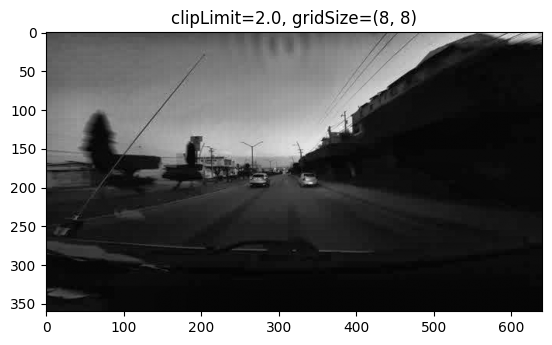

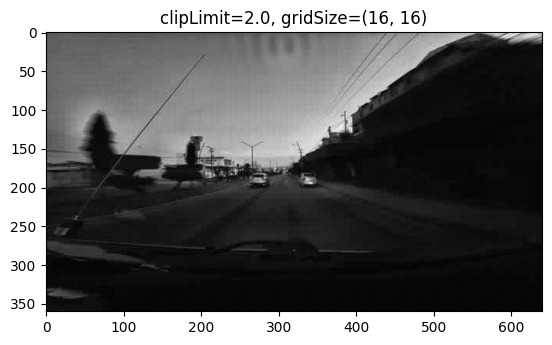

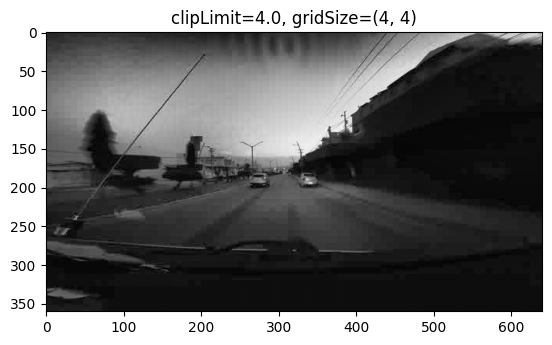

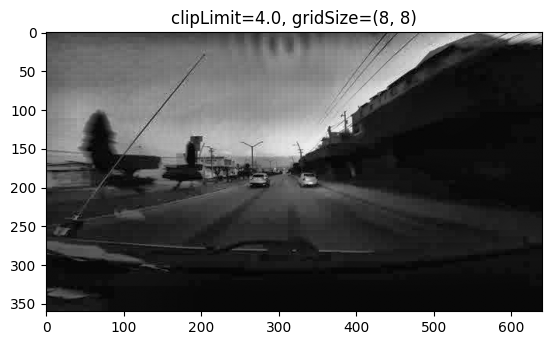

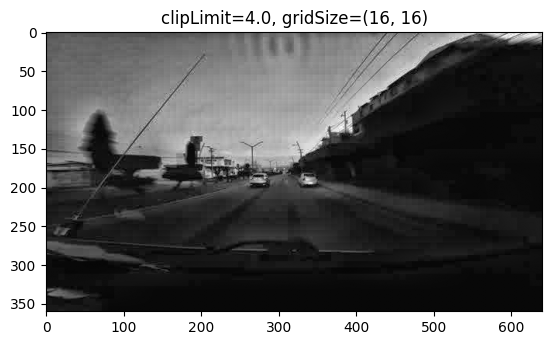

In [48]:
for clip in [1.0, 2.0, 4.0]:
    for grid in [(4,4), (8,8), (16,16)]:
        clahe = cv.createCLAHE(clipLimit=clip, tileGridSize=grid)
        result = clahe.apply(img)
        plt.imshow(result, cmap='gray')
        plt.title(f'clipLimit={clip}, gridSize={grid}')
        plt.show()
